In [ ]:
import pandas as pd

df = pd.read_csv('/content/Youtube02-KatyPerry.csv')   # untuk CSV
df.dtypes

,0
COMMENT_ID,object
AUTHOR,object
DATE,object
CONTENT,object
CLASS,int64


In [ ]:
df['CLASS'].value_counts()

,count
CLASS,
1,175
0,175


# **4.4	Exploratory Data Analysis (EDA)**

In [ ]:
#@title Import dan Load Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv("Youtube02-KatyPerry.csv")

df.head()


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


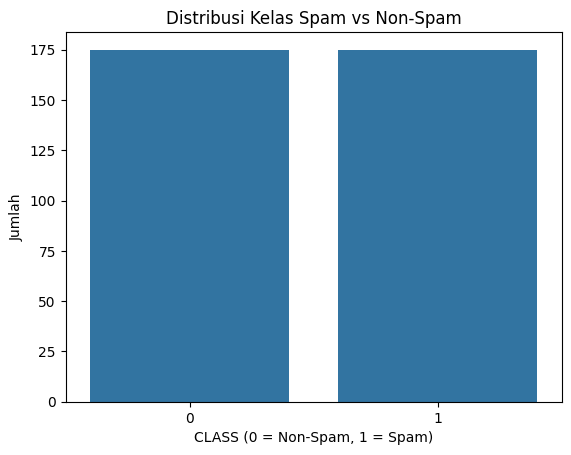

,count
CLASS,
1,175
0,175


In [ ]:
#@title Distribusi Kelas

sns.countplot(data=df, x='CLASS')
plt.title("Distribusi Kelas Spam vs Non-Spam")
plt.xlabel("CLASS (0 = Non-Spam, 1 = Spam)")
plt.ylabel("Jumlah")
plt.show()

df['CLASS'].value_counts()


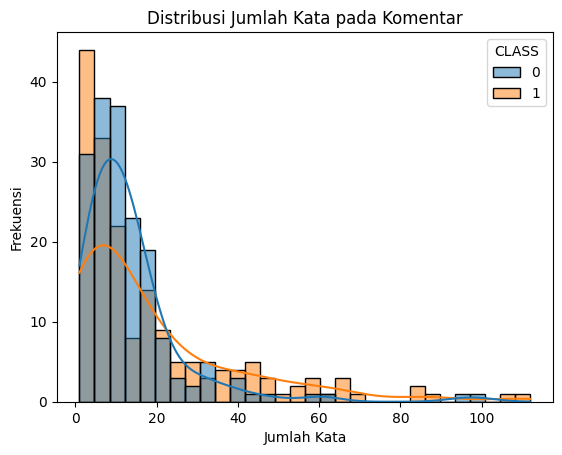

,count,mean,std,min,25%,50%,75%,max
CLASS,,,,,,,,
0,175.0,13.445714,13.575509,1.0,5.5,11.0,16.0,100.0
1,175.0,18.508571,21.227793,1.0,4.5,10.0,24.5,112.0


In [ ]:
#@title Analisis Panjang Komentar

df['word_count'] = df['CONTENT'].apply(lambda x: len(str(x).split()))

sns.histplot(data=df, x='word_count', hue='CLASS', kde=True, bins=30)
plt.title("Distribusi Jumlah Kata pada Komentar")
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.show()

df.groupby('CLASS')['word_count'].describe()


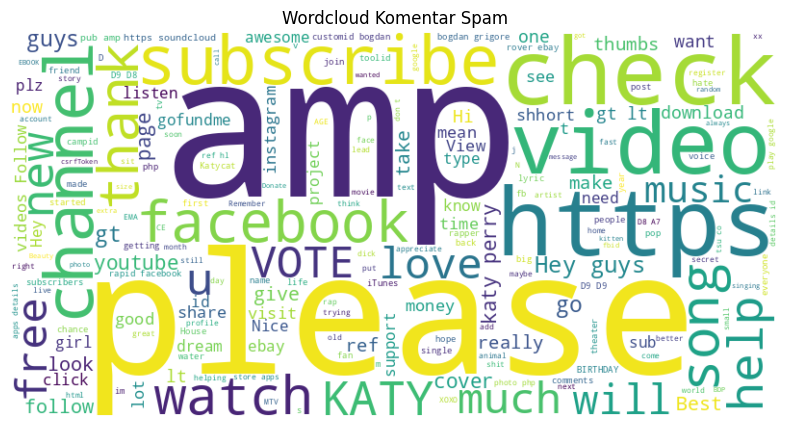

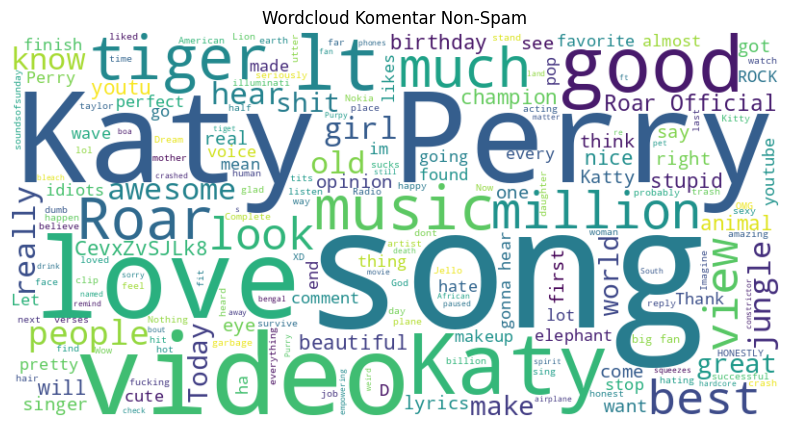

In [ ]:
#@title Wordcloud Spam vs Non-Spam

spam_text = " ".join(df[df['CLASS']==1]['CONTENT'])
nonspam_text = " ".join(df[df['CLASS']==0]['CONTENT'])

# Wordcloud untuk Spam
spam_wc = WordCloud(width=800, height=400, background_color="white").generate(spam_text)
plt.figure(figsize=(10,5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Komentar Spam")
plt.show()

# Wordcloud untuk Non-Spam
nonspam_wc = WordCloud(width=800, height=400, background_color="white").generate(nonspam_text)
plt.figure(figsize=(10,5))
plt.imshow(nonspam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Komentar Non-Spam")
plt.show()


In [ ]:
#@title Tampilkan Beberapa Komentar Spam & Non-Spam

print("=== Contoh Komentar Spam ===")
print(df[df['CLASS']==1]['CONTENT'].head(5))
print("\n=== Contoh Komentar Non-Spam ===")
print(df[df['CLASS']==0]['CONTENT'].head(5))


=== Contoh Komentar Spam ===
0    i love this so much. AND also I Generate Free ...
1    http://www.billboard.com/articles/columns/pop-...
2    Hey guys! Please join me in my fight to help a...
3    http://psnboss.com/?ref=2tGgp3pV6L this is the...
4    Hey everyone. Watch this trailer!!!!!!!!  http...
Name: CONTENT, dtype: object

=== Contoh Komentar Non-Spam ===
35    katy perry does remind me of a tiger,like as i...
36    In what South American jungle or any jungle fo...
39    Its a good song and i like her video clip, bec...
42    Thanks to this video we know that Nokia phones...
46    She named the tiger Kitty Purry  No, seriously...
Name: CONTENT, dtype: object


# **5.	DATA PREPARATION**

In [ ]:
#@title Missing Values

df['CLASS'].value_counts()

#tidak ada data yang hilang/missing value

,count
CLASS,
1,175
0,175


In [ ]:
#@title Duplicate Data

df.duplicated(subset=['CONTENT'])

#tidak ada data duplikat

,0
0,False
1,False
2,False
3,False
4,False
...,...
345,False
346,False
347,False
348,False


In [ ]:
#@title Cek tipe Data

import pandas as pd

df = pd.read_csv('/content/Youtube02-KatyPerry.csv')   # untuk CSV
df.dtypes

,0
COMMENT_ID,object
AUTHOR,object
DATE,object
CONTENT,object
CLASS,int64


# **5.3	Data Transformation**

In [ ]:
#@title Import Library Dasar + Load Dataset

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("Youtube02-KatyPerry.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#@title Fungsi Text Cleaning (Lowercase + Hapus URL + Simbol + Stopwords + Lemmatization)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()                                      # lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)              # remove URL
    text = re.sub(r'[^a-zA-Z\s]', '', text)                  # remove symbols
    tokens = text.split()                                    # tokenization
    tokens = [w for w in tokens if w not in stop_words]      # stopwords removal
    tokens = [lemmatizer.lemmatize(w) for w in tokens]       # lemmatization
    return " ".join(tokens)


In [ ]:
#@title Terapkan Cleaning ke Kolom CONTENT

df['clean_content'] = df['CONTENT'].apply(clean_text)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,clean_content
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1,love much also generate free lead auto pilot amp
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1,vote sone pleasewere vipsplease help u gtlt
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1,hey guy please join fight help abusedmistreate...
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1,song
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1,hey everyone watch trailer


In [ ]:
#@title TF-IDF Vectorization (UNTUK MODEL MACHINE LEARNING)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_content'])
y = df['CLASS']

In [ ]:
#@title Tokenization + Padding (UNTUK MODEL LSTM)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_content'])

# Transform text → sequence
sequences = tokenizer.texts_to_sequences(df['clean_content'])

# Padding
max_len = 100  # bisa disesuaikan
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

y = df['CLASS']

# **5.4 Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,           # atau X_padded jika untuk LSTM
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples :", X_train.shape[0])
print("Test samples     :", X_test.shape[0])

Training samples : 280
Test samples     : 70


# **6.1.2	Hyperparameter**

In [ ]:
#@title  Menampilkan Hyperparameter Naive Bayes

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.get_params()


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

# **6.1.3	Implementasi (Ringkas)**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_baseline = MultinomialNB()

model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)


# **6.1.4	Hasil Awal**

In [ ]:
#@title Import metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#@title Hitung evaluasi umum

accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline)
recall = recall_score(y_test, y_pred_baseline)
f1 = f1_score(y_test, y_pred_baseline)

print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1-Score  :", f1)


Accuracy  : 0.8
Precision : 0.8387096774193549
Recall    : 0.7428571428571429
F1-Score  : 0.7878787878787878


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=["Non-Spam", "Spam"]))


Classification Report:
              precision    recall  f1-score   support

    Non-Spam       0.77      0.86      0.81        35
        Spam       0.84      0.74      0.79        35

    accuracy                           0.80        70
   macro avg       0.80      0.80      0.80        70
weighted avg       0.80      0.80      0.80        70



# **6.2.2	Hyperparameter**

In [ ]:
#@title Import Library

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title Hyperparameter yang digunakan

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

# **6.2.3	Implementasi (Ringkas)**

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

# Melatih model
rf_model.fit(X_train, y_train)

# Melakukan prediksi pada data test
y_pred_rf = rf_model.predict(X_test)


# **6.2.4	Hasil Model**

In [ ]:
#@title Import Library Evaluasi

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#@title Hitung Metrik Evaluasi

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1-Score  :", f1)

Accuracy  : 0.7571428571428571
Precision : 0.7045454545454546
Recall    : 0.8857142857142857
F1-Score  : 0.7848101265822784


In [ ]:
#@title Classification Report

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred_rf,
    target_names=["Non-Spam", "Spam"]
))



Classification Report:
              precision    recall  f1-score   support

    Non-Spam       0.85      0.63      0.72        35
        Spam       0.70      0.89      0.78        35

    accuracy                           0.76        70
   macro avg       0.78      0.76      0.75        70
weighted avg       0.78      0.76      0.75        70



# **6.3.3	Input & Preprocessing Khusus**

In [ ]:
#@title Import Library

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



In [ ]:
# Parameter
MAX_WORDS = 5000
MAX_LEN = 100

# Tokenizer (khusus Deep Learning)
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_content'])

# Mengubah teks menjadi sequence angka
sequences = tokenizer.texts_to_sequences(df['clean_content'])

# Padding agar panjang input seragam
X = pad_sequences(sequences, maxlen=MAX_LEN)

# Label
y = df['CLASS'].values

In [ ]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X,
    y,
    df.index,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## **6.3.4 Hyperparameter (Deep Learning)**

In [ ]:
#@title Arsitektur Model LSTM

model_dl = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#@title Compile Model (Hyperparameter)

model_dl.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
#@title Callback EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)


# **6.3.5	Implementasi (Ringkas)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Arsitektur model LSTM
model_dl = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
model_dl.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callback EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Training model
history = model_dl.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.4864 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6904
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.6243 - loss: 0.6756 - val_accuracy: 0.6071 - val_loss: 0.6799
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.7693 - loss: 0.6558 - val_accuracy: 0.6964 - val_loss: 0.6570
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8910 - loss: 0.6110 - val_accuracy: 0.7857 - val_loss: 0.6008
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8647 - loss: 0.5439 - val_accuracy: 0.8214 - val_loss: 0.5325
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8787 - loss: 0.4123 - val_accuracy: 0.7679 - val_loss: 0.4348
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9234 - loss: 0.3083 - val_accuracy: 0.8036 - val_loss: 0.4089
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9277 - loss: 0.2398 - val_accuracy: 0.8571 - val_loss: 0.35

In [ ]:
from sklearn.metrics import classification_report

y_pred_dl = (model_dl.predict(X_test) > 0.5).astype(int)

print(classification_report(
    y_test,
    y_pred_dl,
    target_names=["Non-Spam", "Spam"]
))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
              precision    recall  f1-score   support

    Non-Spam       0.82      0.89      0.85        35
        Spam       0.88      0.80      0.84        35

    accuracy                           0.84        70
   macro avg       0.85      0.84      0.84        70
weighted avg       0.85      0.84      0.84        70



# **Training History Visualization:**

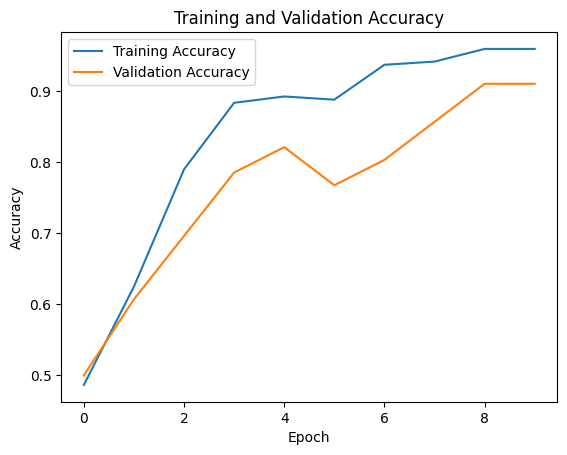

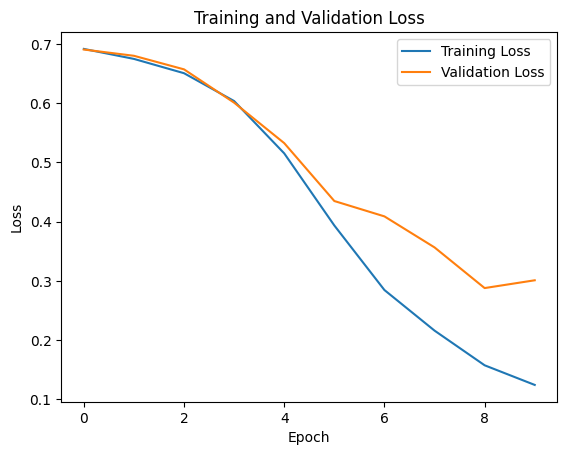

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

# Loss plot
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


# **6.3.7	Model Summary**

In [ ]:
model_dl.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_27 (Embedding)        │ (32, 100, 128)         │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,068,421 (7.89 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,378,948 (5.26 MB)

# **7.2	Hasil Evaluasi Model**

In [ ]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Non-Spam", "Spam"],
        yticklabels=["Non-Spam", "Spam"]
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()


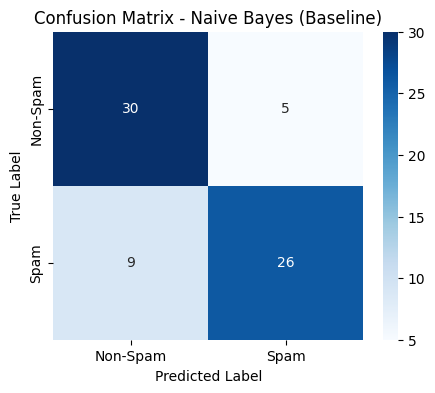

In [ ]:
#@title Model 1 – Naive Bayes

plot_confusion_matrix(
    y_test,
    y_pred_baseline,
    "Confusion Matrix - Naive Bayes (Baseline)"
)

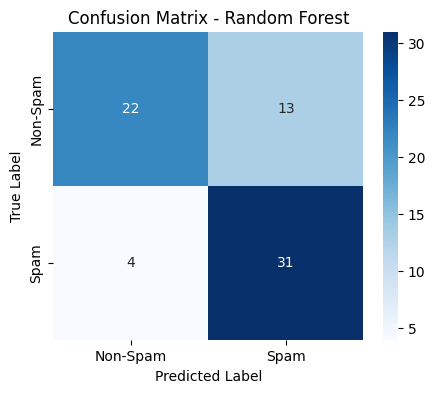

In [ ]:
#@title Model 2 – Random Forest

plot_confusion_matrix(
    y_test,
    y_pred_rf,
    "Confusion Matrix - Random Forest"
)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


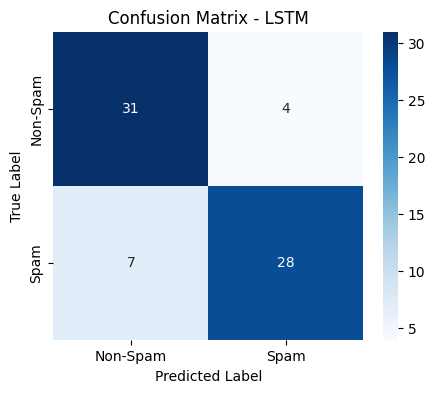

In [ ]:
#@title Model 3 – LSTM (Deep Learning)

# Prediksi probabilitas
y_pred_prob_dl = model_dl.predict(X_test)

# Konversi ke label (0 atau 1)
y_pred_dl = (y_pred_prob_dl > 0.5).astype(int)

plot_confusion_matrix(
    y_test,
    y_pred_dl,
    "Confusion Matrix - LSTM"
)

# **Test Set Predictions:**

In [ ]:
import pandas as pd

# Prediksi pada data test
y_pred_dl = (model_dl.predict(X_test) > 0.5).astype(int).flatten()

# Buat DataFrame contoh hasil prediksi
sample_predictions = pd.DataFrame({
    "Komentar": df.loc[idx_test, "CONTENT"].values[:5],
    "Label Asli": y_test[:5],
    "Prediksi Model": y_pred_dl[:5]
})

sample_predictions


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,Komentar,Label Asli,Prediksi Model
0,"People, here is a new network like FB...you re...",1,1
1,"I make guitar covers, please have a look at my...",1,1
2,want to win borderlands the pre-sequel? check ...,1,1
3,Awesum song!! Jus luv it!﻿,0,0
4,even without make up she is still hot htt...,1,0


# **Visualisasi Perbandingan:**

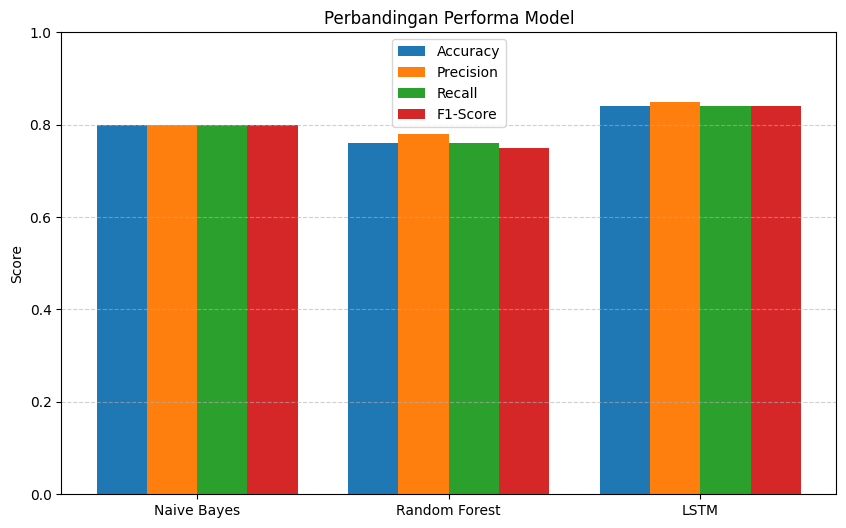

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data metrik
models = ['Naive Bayes', 'Random Forest', 'LSTM']

accuracy = [0.80, 0.76, 0.84]
precision = [0.80, 0.78, 0.85]
recall = [0.80, 0.76, 0.84]
f1_score = [0.80, 0.75, 0.84]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))

plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1_score, width, label='F1-Score')

plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Perbandingan Performa Model')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


# **Menyimpan Model**

In [ ]:
import joblib

In [ ]:
#@title model 1
joblib.dump(model_baseline, "model_baseline.pkl")

['model_baseline.pkl']

In [ ]:
#@title model 2
joblib.dump(rf_model, "model_rf.pkl")

['model_rf.pkl']

In [ ]:
#@title model 3
model_dl.save("model_lstm.h5")

# **10.2	Environment & Dependencies**

In [ ]:
!pip freeze > requirements.txt
